In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
import pandas as pd
 
df = pd.read_csv("/content/test.csv", nrows=1000)
df


,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
995,995,How is RAU's IAS study circle (Bangalore branc...,How Rau's IAS Study Circle in the Bangalore br...
996,996,"How NFL, can you try to kick a field goal on a...",What is the point of having good on the NFL go...
997,997,How do is campus life at St. Thomas College of...,How is campus life layer placements at St Thom...
998,998,How do I earn money with prefer?,What is on YouTube?


In [ ]:
df.shape

(1000, 3)

In [ ]:
import gensim 

from gensim.models import Word2Vec

In [ ]:
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
documents = []
for index, row in df.iterrows():
    documents.append(read_questions(row,"question1"))
    if row['question1'] in row['question2']:
        documents.append(read_questions(row,"question2"))
    

In [ ]:
print("List of lists. Let's confirm: ", type(documents), " of ", type(documents[0]))

List of lists. Let's confirm:  <class 'list'>  of  <class 'list'>


In [ ]:
model = gensim.models.Word2Vec(size=150, window=10, min_count=2, sg=1, workers=10)
model.build_vocab(documents)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
model.train(sentences=documents, total_examples=len(documents), epochs=model.iter)

(27360, 51460)

In [ ]:
word_vectors = model.wv
count = 0
for word in word_vectors.vocab:
    if count<10:
        print(word)
        count += 1
    else:
        break

how
does
the
pro
himself
with
ipad
should
have
hair


In [ ]:
len(word_vectors.vocab)

1036

In [ ]:
vector = model.wv["ipad"]  # numpy vector of a word
len(vector)

150

In [51]:
vector

array([ 0.00794638,  0.04338106, -0.03880892, -0.07156917, -0.05847612,
        0.16747649, -0.00304395,  0.03460117,  0.12721245,  0.07915718,
       -0.15663475,  0.00511145,  0.08673151,  0.08659643, -0.03105988,
        0.00596614,  0.07139035, -0.00251018,  0.02488132,  0.12504572,
       -0.1121119 ,  0.05641247, -0.03725784, -0.01942691, -0.02786348,
        0.02713713,  0.02154482,  0.0527408 ,  0.020251  , -0.02730941,
        0.10377947, -0.02975589,  0.01218577, -0.03991265,  0.0136402 ,
       -0.00874404, -0.08064378,  0.0108214 ,  0.06180128,  0.05433092,
       -0.02728837,  0.10504122, -0.01545786,  0.04692714, -0.09455631,
       -0.06910097,  0.00644476, -0.01518245,  0.03953103,  0.05293074,
       -0.02887705,  0.09690926,  0.06689048, -0.0335815 ,  0.06796919,
        0.11351245,  0.10555493,  0.04319363,  0.0756511 , -0.00337502,
       -0.00749293,  0.01923547, -0.08036407, -0.06354385, -0.03062343,
        0.01186073,  0.01050739,  0.11536524, -0.00252203,  0.01

In [52]:
wanted_words = []
count = 0
for word in word_vectors.vocab:
    if count<150:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, word_vectors.vocab[k]) for k in wanted_words if k in word_vectors.vocab)
wanted_vocab

{'affect': <gensim.models.keyedvectors.Vocab at 0x7f8dc8bb6290>,
 'after': <gensim.models.keyedvectors.Vocab at 0x7f8dc8c9c4d0>,
 'against': <gensim.models.keyedvectors.Vocab at 0x7f8dc8c9c310>,
 'age': <gensim.models.keyedvectors.Vocab at 0x7f8dc8c8da10>,
 'all': <gensim.models.keyedvectors.Vocab at 0x7f8dc8c9c450>,
 'am': <gensim.models.keyedvectors.Vocab at 0x7f8dc8bb6090>,
 'an': <gensim.models.keyedvectors.Vocab at 0x7f8dc8bb6790>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7f8dc8c9c210>,
 'android': <gensim.models.keyedvectors.Vocab at 0x7f8dc8c9c850>,
 'anything': <gensim.models.keyedvectors.Vocab at 0x7f8dc8c9c750>,
 'app': <gensim.models.keyedvectors.Vocab at 0x7f8dc8c9c7d0>,
 'are': <gensim.models.keyedvectors.Vocab at 0x7f8dc8c8df10>,
 'army': <gensim.models.keyedvectors.Vocab at 0x7f8dc8bb6cd0>,
 'at': <gensim.models.keyedvectors.Vocab at 0x7f8dc8c8d9d0>,
 'ba': <gensim.models.keyedvectors.Vocab at 0x7f8dc8bb68d0>,
 'batman': <gensim.models.keyedvectors.Vocab at 0x7f8dc

In [53]:
from sklearn.manifold import TSNE
%matplotlib inline
from matplotlib import pyplot as plt

In [54]:
X = model[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

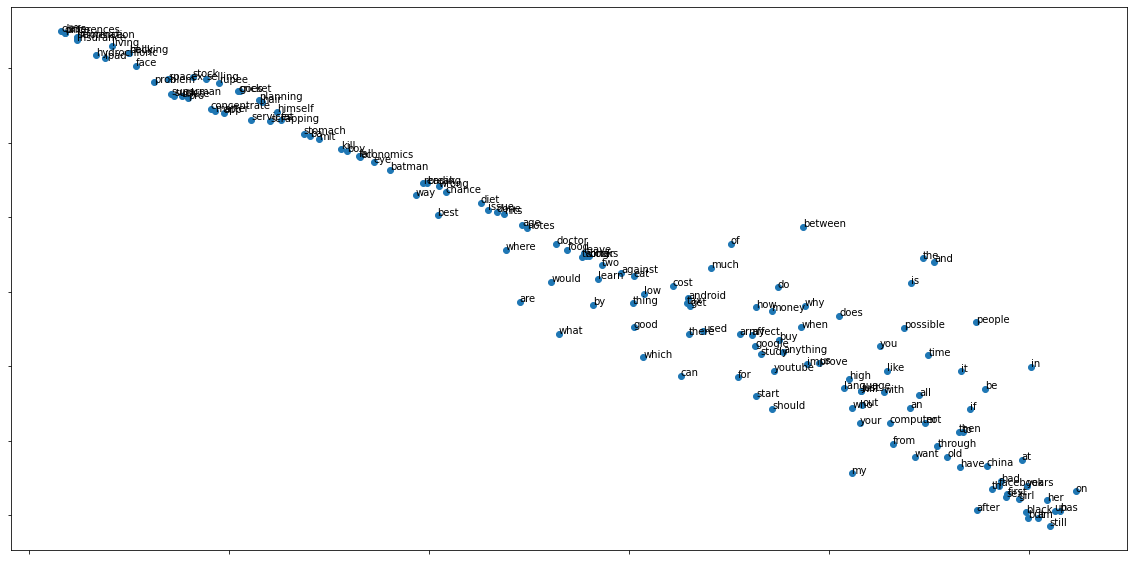

In [60]:
#Plot the t-SNE output
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
_ = plt.show()

In [61]:
w1 = "between"
model.wv.most_similar(positive=w1, topn=5)

[('and', 0.9983859658241272),
 ('the', 0.9980474710464478),
 ('difference', 0.9978622794151306),
 ('antenna', 0.9974787831306458),
 ('being', 0.9973992109298706)]

In [63]:
w1 = ["android","bad"]
w2 = ["youtube"]
model.wv.most_similar (positive=w1,negative=w2,topn=2)

[('instagram', 0.999336838722229), ('doesn', 0.9993032217025757)]

In [64]:
model.wv.doesnt_match(["android","youtube","china"])

'china'

# New Section